/Users/emilywhittaker/AnacondaProjects/CodeAstro/group_project/Small/ZTFJ1256+2117_07_21_2021_L_60sec_0001.fit
2021-07-22T04:21:05.0342020
/Users/emilywhittaker/AnacondaProjects/CodeAstro/group_project/Small/ZTFJ1256+2117_07_21_2021_L_60sec_0002.fit
2021-07-22T04:23:18.1138137
/Users/emilywhittaker/AnacondaProjects/CodeAstro/group_project/Small/ZTFJ1256+2117_07_21_2021_L_60sec_0003.fit
2021-07-22T04:25:11.3112883
/Users/emilywhittaker/AnacondaProjects/CodeAstro/group_project/Small/ZTFJ1256+2117_07_21_2021_L_60sec_0004.fit
2021-07-22T04:27:07.7569486
/Users/emilywhittaker/AnacondaProjects/CodeAstro/group_project/Small/ZTFJ1256+2117_07_21_2021_L_60sec_0005.fit
2021-07-22T04:29:14.8512179
/Users/emilywhittaker/AnacondaProjects/CodeAstro/group_project/Small/ZTFJ1256+2117_07_21_2021_L_60sec_0006.fit
2021-07-22T04:31:19.9733745
/Users/emilywhittaker/AnacondaProjects/CodeAstro/group_project/Small/ZTFJ1256+2117_07_21_2021_L_60sec_0007.fit
2021-07-22T04:33:25.4475512
/Users/emilywhittaker/Anaco

/var/folders/02/1czf1gxd31x7ld0967mhs8sw0000gn/T/ipykernel_12556/2206109201.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


/Users/emilywhittaker/AnacondaProjects/CodeAstro/group_project/Small/ZTFJ1256+2117_07_21_2021_L_60sec_0023.fit
2021-07-22T05:04:42.5119132
/Users/emilywhittaker/AnacondaProjects/CodeAstro/group_project/Small/ZTFJ1256+2117_07_21_2021_L_60sec_0024.fit
2021-07-22T05:06:53.7294184
/Users/emilywhittaker/AnacondaProjects/CodeAstro/group_project/Small/ZTFJ1256+2117_07_21_2021_L_60sec_0025.fit
2021-07-22T05:08:43.9987254
/Users/emilywhittaker/AnacondaProjects/CodeAstro/group_project/Small/ZTFJ1256+2117_07_21_2021_L_60sec_0026.fit
2021-07-22T05:10:42.8325223
[-2.82826818e+04 -3.90415431e+03  1.91592413e+03  1.29169942e+03
  4.33903981e+03  4.41915517e+03  8.28774308e+02  2.12441103e+03
  5.01959148e+03  5.37780234e+02  1.40599457e+02  6.40439727e+03
  2.39809313e+03 -6.82417195e+02  1.38635262e+02 -1.25022332e+03
 -2.08180226e+00 -6.76982221e+02  8.80971376e+02 -7.44537495e+02
 -8.10868404e+02 -1.35698837e+03 -4.90072612e+02 -1.60161561e+03
 -1.31104528e+03  2.27152431e+03]


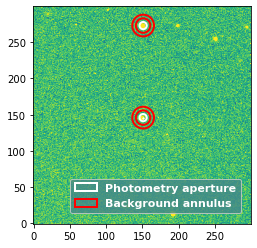

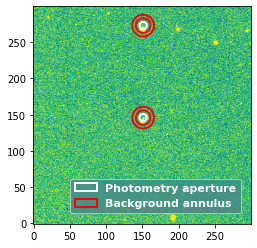

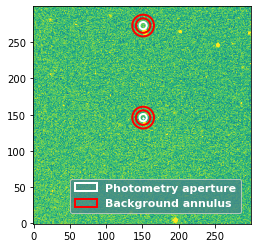

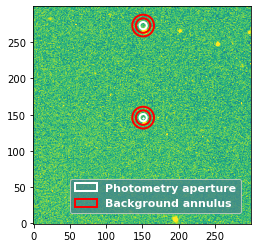

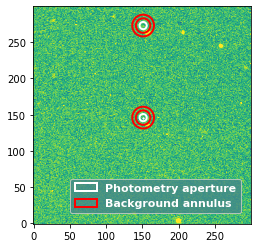

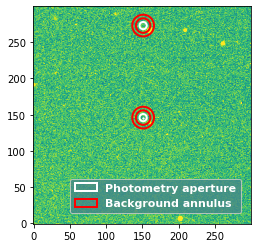

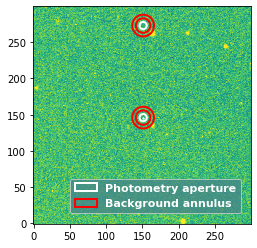

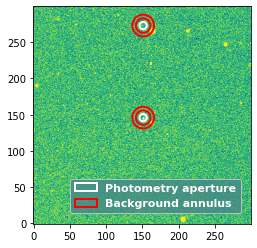

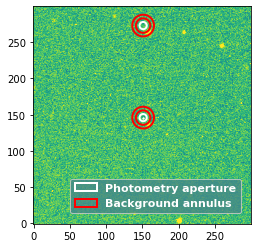

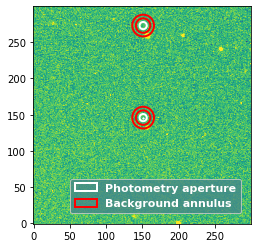

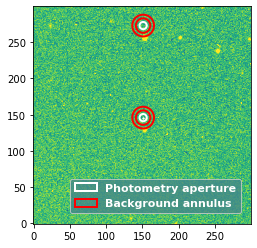

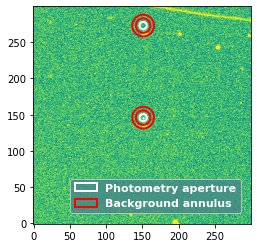

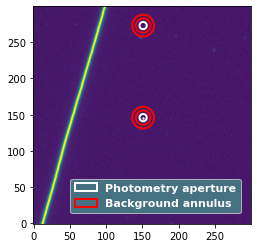

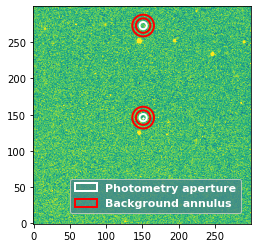

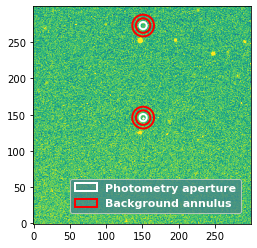

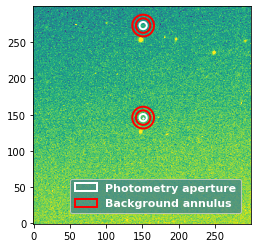

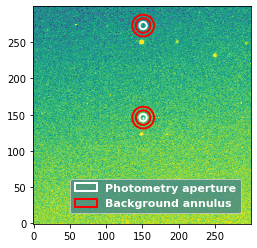

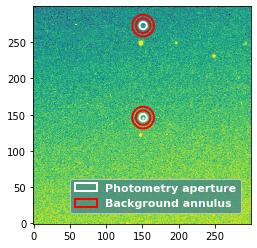

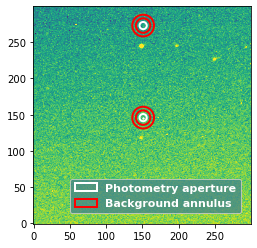

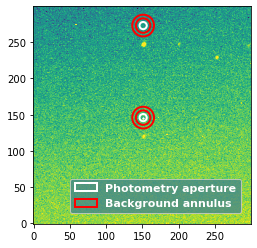

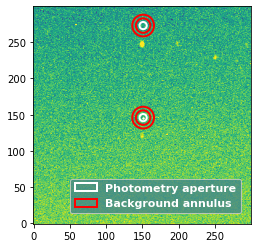

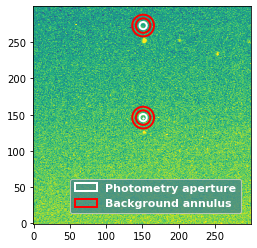

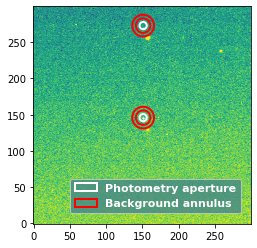

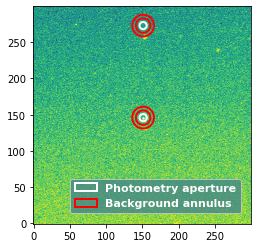

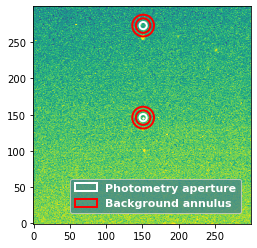

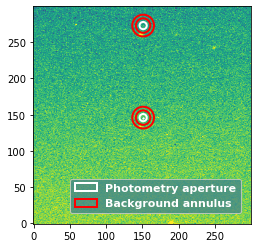

In [32]:
#Code Astro Group 36 Project
#Creating a stellar lightcurve

"""
Input: fits image, stellar coordinates
Output: lightcurve
"""

#Importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from photutils.aperture import SkyCircularAperture
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.time import Time
import astropy.wcs as wcs
from photutils.aperture import CircularAperture, CircularAnnulus, ApertureStats, aperture_photometry
from astropy.visualization import simple_norm
import glob
#from astroquery.astrometry_net import AstrometryNet

#Inputs: 
fitsfile = '/Users/emilywhittaker/AnacondaProjects/CodeAstro/group_project/Small/ZTFJ1256+2117_07_21_2021_L_60sec_0001.fit'
#radec = ['19:05:36.3066', '28:38:04.028']
pixels = [1529, 1524] #[4785, 3188] #pixel location of the target star
refpixels = [1529, 1651] #[4705, 3216] #pixel location of the reference star
ap_size = 5 # aperture size, in pixels
an_small = 10 # size of inner ring of annulus, in pixels
an_large = 15 #size of outer ring of annulus, in pixels
imsz = 150 # number of pixels from the middle to the edge of the image, in x and y

plt.close('all')

def star_counts(pixels, data):
    #Getting the mean background 
    aperture = CircularAperture(pixels, r=ap_size)
    annulus_aperture = CircularAnnulus(pixels, r_in=an_small, r_out=an_large)
    aperstats = ApertureStats(data, annulus_aperture)
    bkg_mean = aperstats.mean

    #Getting the aperture area
    phot_table = aperture_photometry(data, aperture)
    aperture_area = aperture.area_overlap(data)

    #Getting the photometry within the aperture
    total_bkg = bkg_mean * aperture_area
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    return phot_bkgsub, aperture, annulus_aperture #total counts within the aperture, aperture object, annulus_object


files = sorted(glob.glob('/Users/emilywhittaker/AnacondaProjects/CodeAstro/group_project/Small/*.fit'))
relstars_lst = []
for i in range(len(files)):
    fitsfile = files[i]
    print(fitsfile)

    # importing the fits file and extracting data
    image_file = get_pkg_data_filename(fitsfile)
    image_data = fits.getdata(image_file, header=True)
    data = image_data[0]
    hdr = image_data[1]

    #Extracting the time from the image header and converting to MJD
    time = hdr['DATE-OBS']
    print(time)
    t = Time(time, format='isot', scale='utc')

    #Converting the input coordinates to pixel coordinates in the image
    """
    hdulist = fits.open(fitsfile, memmap=True)
    w = wcs.WCS(hdr, hdulist)
    print(w)
    xy = w.wcs_world2pix(radec, 1) # maybe try skycoord to pixel
    print(xy)
    """

    #Shrinking the data to a reasonable size
    limx = data.shape[0]//2
    limy = data.shape[1]//2
    small_data = data[limx-imsz:limx+imsz, limy-imsz:limy+imsz]
    small_pixels = [pixels[0]-limy+imsz, pixels[1]-limx+imsz]
    small_refpixels = [refpixels[0]-limy+imsz, refpixels[1]-limx+imsz]
    
    #Checking that the location in pixels is correct by plotting
    norm = simple_norm(small_data, 'sqrt', percent=99)
    plt.figure()
    plt.imshow(small_data, norm=norm)
    plt.scatter(small_pixels[0], small_pixels[1], color='w', marker='*', s=2)
    plt.gca().invert_yaxis()

    #Getting the instrument counts for the star and the reference star
    star_cts, star_aperture, star_annulus = star_counts(small_pixels, small_data)
    refstar_cts, refstar_aperture, refstar_annulus = star_counts(small_refpixels, small_data)

    #Relative counts (star - reference star)
    rel_star_cts = star_cts - refstar_cts
    relstars_lst.append(rel_star_cts[0])

    #Plotting the annulus and aperture as a check
    ap_patches = star_aperture.plot(color='white', lw=2,
                            label='Photometry aperture')
    ann_patches = star_annulus.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(loc=(0.17, 0.05), facecolor='#458989', labelcolor='white',
            handles=handles, prop={'weight': 'bold', 'size': 11})

    ref_ap_patches = refstar_aperture.plot(color='white', lw=2,
                            label='Photometry aperture')
    ref_ann_patches = refstar_annulus.plot(color='red', lw=2,
                                        label='Background annulus')

    #Flux = Gain * Counts / Exptime 

#Plotting the light curve
relstars = np.array(relstars_lst)
#plt.figure()

